[emd PyPI](https://pypi.org/project/emd/)

In [2]:
!pip install emd
import emd

     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 47 kB 4.5 MB/s 
     |████████████████████████████████| 2.8 MB 18.9 MB/s 


In [9]:
sample_rate = 1000
seconds = 10
num_samples = sample_rate*seconds

import numpy as np
time_vect = np.linspace(0, seconds, num_samples)

freq = 5
nonlinearity_deg = .25  # change extent of deformation from sinusoidal shape [-1 to 1]
nonlinearity_phi = -np.pi/4  # change left-right skew of deformation [-pi to pi]
x = emd.utils.abreu2010(freq, nonlinearity_deg, nonlinearity_phi, sample_rate, seconds)
x += np.cos(2*np.pi*1*time_vect)

In [10]:
imf = emd.sift.sift(x)

In [11]:
IP, IF, IA = emd.spectra.frequency_transform(imf, sample_rate, 'hilbert')

In [12]:
freq_edges, freq_bins = emd.spectra.define_hist_bins(0, 10, 100)
hht = emd.spectra.hilberthuang(IF, IA, freq_edges)

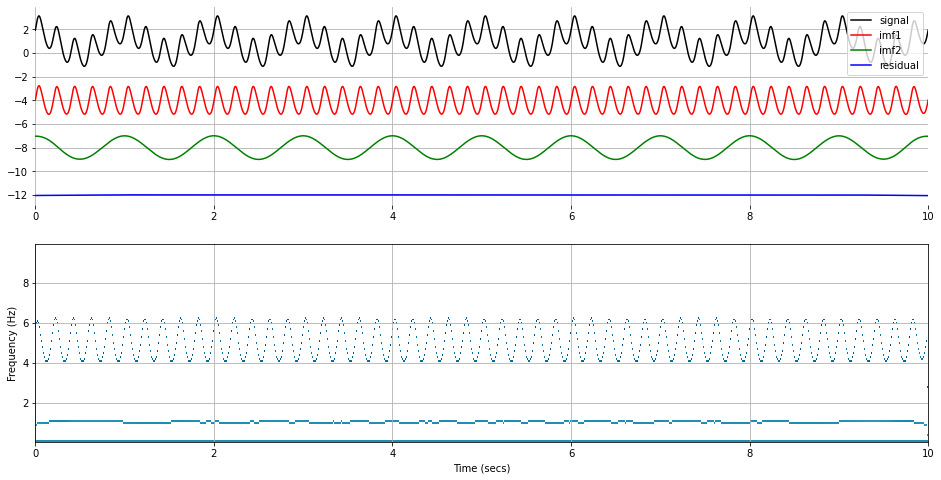

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))

plt.subplot(211, frameon=False)
plt.plot(time_vect, x, 'k', label='signal')
plt.plot(time_vect, imf[:, 0]-4, 'r', label='imf1')
plt.plot(time_vect, imf[:, 1]-8, 'g', label='imf2')
plt.plot(time_vect, imf[:, 2]-12, 'b', label='residual')
plt.legend()
plt.xlim(time_vect[0], time_vect[-1])
plt.grid(True)

plt.subplot(212)
plt.pcolormesh(time_vect, freq_bins, hht, cmap='ocean_r')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (secs)')
plt.grid(True)

plt.show()